<h1>Importing Libraries</h1>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("players_fifa23.csv")
data.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [ ]:
data.shape

(18539, 90)

In [ ]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


data = data[needed_columns]

<h1>Analysis</h1>

<h3>1. Does the Player's age affect his ball control ability?</h3>

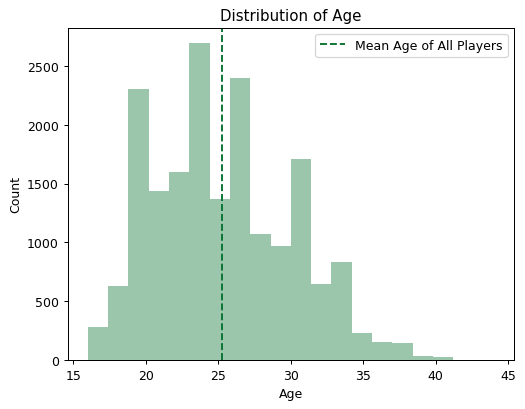

In [ ]:
sns.set_palette("Greens_r")
plt.figure(dpi=90)
sns.distplot(x=data['Age'], kde=False, bins=20)
plt.axvline(x=np.mean(data['Age']), ls='--', label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

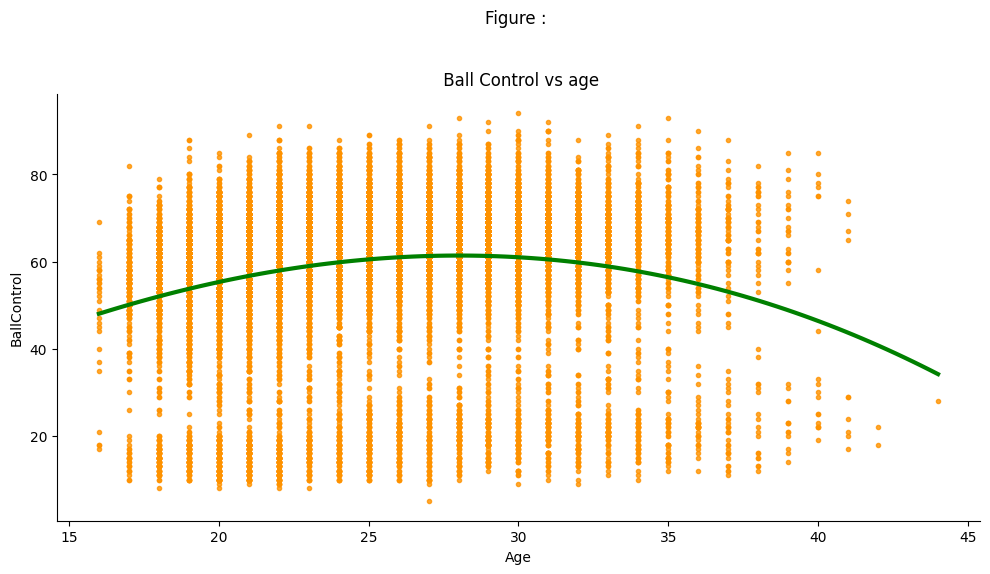

In [ ]:
sns.set_palette("Wistia_r")
sns.lmplot(x="Age", y="BallControl",data=data,markers=".",
           order=3, ci=None, line_kws={"linewidth":3,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Ball Control vs age");
plt.show()

<h4>The conclusion that can be derived from the above plot is that the age has an effect on the Player's Ball Control.</br></br>
    - While the Age is increasing, the Ball Control decreases.
</h4>


<h3>2. How does the player's height affects different factors like stamina, dribbling, pace, passing and heading accuracy?</h3>

<Axes: xlabel='Height', ylabel='Value'>

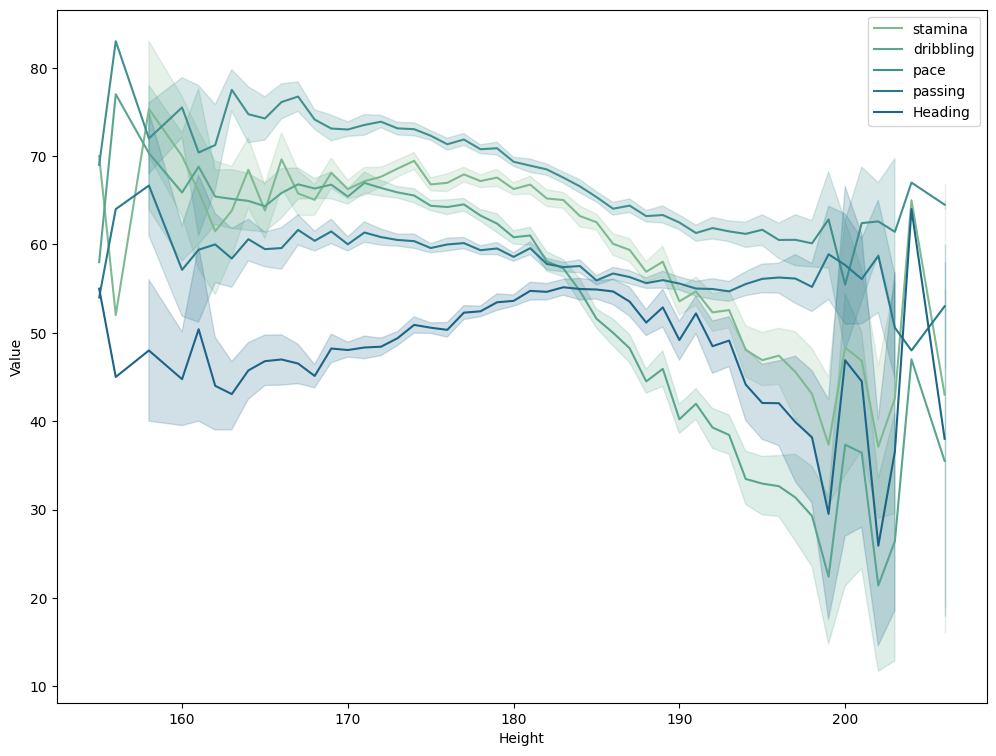

In [ ]:
sns.set_palette("crest")
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.ylabel("Value")

sns.lineplot(x='Height', y='Stamina', data=data, legend='brief', label='stamina')
sns.lineplot(x='Height', y='Dribbling', data=data, legend='brief', label='dribbling')
sns.lineplot(x='Height', y='PaceTotal', data=data, legend='brief', label='pace')
sns.lineplot(x='Height', y='PassingTotal', data=data, legend='brief', label='passing')
sns.lineplot(x='Height', y='HeadingAccuracy', data=data, legend='brief', label='Heading')

<h4>The conclusion that can be derived from the above plot is that the height has significant effect on the above stated factors.<br><br>
- As height increases, features like stamina, dribbling, pace, passing decreases.</br> </br>
- As height increases, features like Heading increase.</h4>

<h3>3. Is there a relation between Wage and Overall of the Players?</h3>

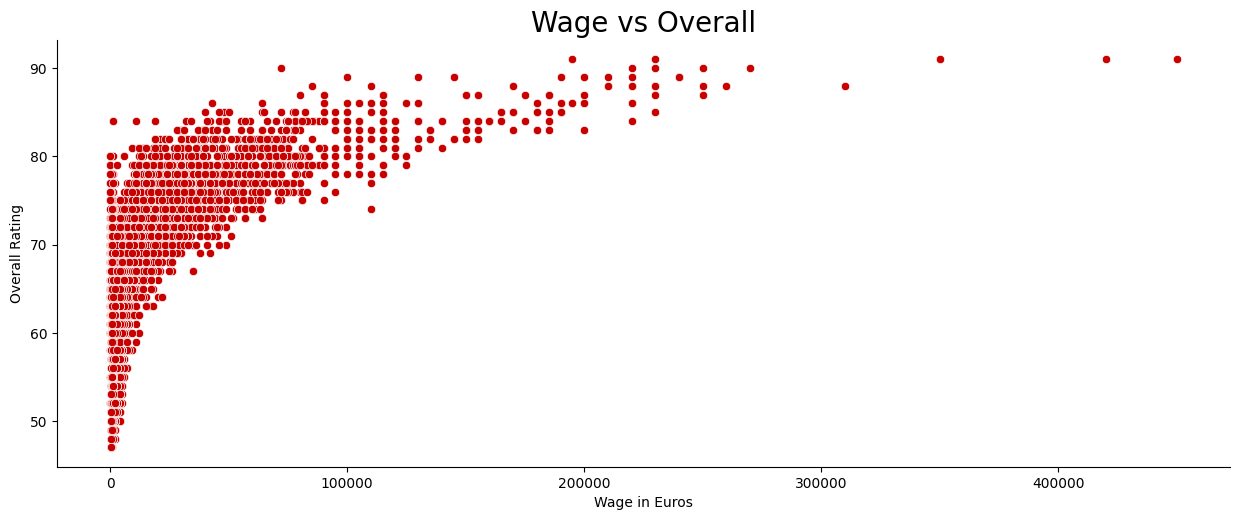

In [ ]:
sns.set_palette("seismic_r")
sns.relplot(x='WageEUR',y='Overall',palette = 'viridis', aspect=2.5,data=data)
plt.title('Wage vs Overall',fontsize = 20)
plt.xlabel('Wage in Euros')
plt.ylabel('Overall Rating')
plt.show()

<h4>
The conclusion that can be derived from the above plot is that there is a direct relation between player's wage and their overall rating.<br><br>- As the Overall Rating Increase, the Wage of the Player Increases too.</h4>

<h3>4. To Show the Players with highest pace:</h3>

In [ ]:
top_acc = data.sort_values(by=["Acceleration"], ascending=False)

<Axes: xlabel='Name', ylabel='Acceleration'>

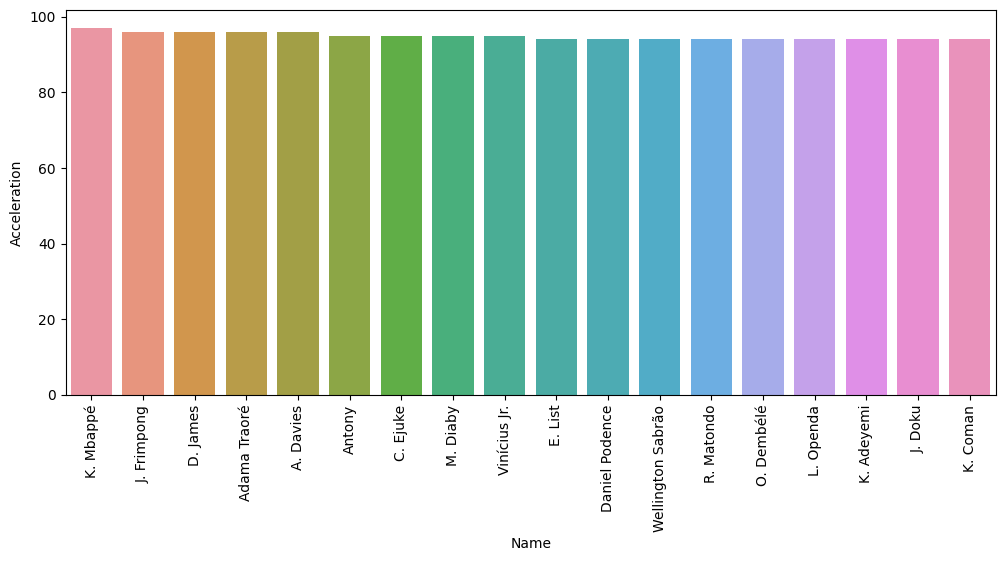

In [ ]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Acceleration", data=top_acc.head(20))

<h3>5. TO Determine if their is a relation between the Position of the Player and his Wage and Value:</h3>

<Axes: xlabel='BestPosition', ylabel='WageEUR'>

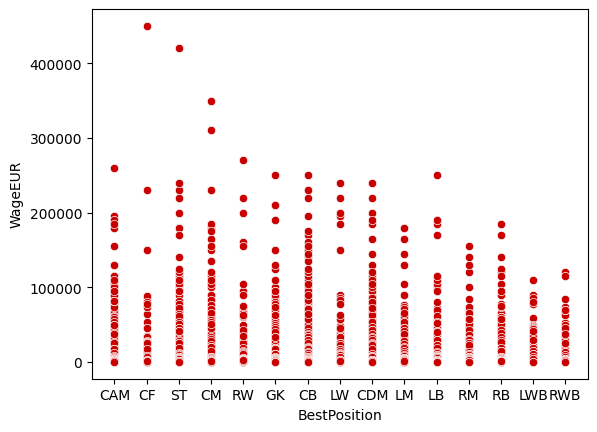

In [ ]:
sns.scatterplot(x="BestPosition", y="WageEUR", data=data)

<Axes: xlabel='BestPosition', ylabel='ValueEUR'>

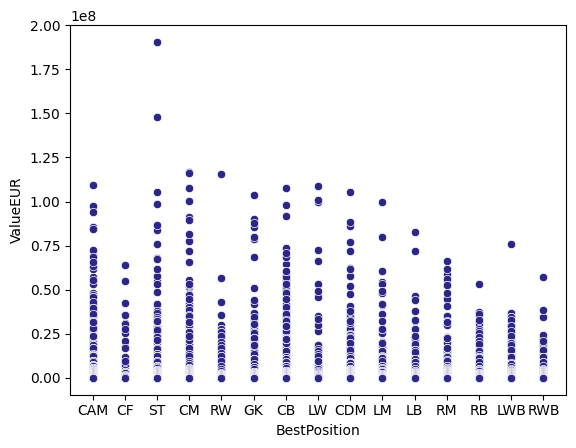

In [ ]:
sns.set_palette("CMRmap")
sns.scatterplot(x="BestPosition", y="ValueEUR", data=data)

<h4>The conclusion that can be derived from the above plot is that there is a direct relation between player's wage and values and their position on the field.
- So we can see that the Players in Positions LM, RM, RB, LWB, RWB got the lowest Wages and the Players With Positions LB, RB, LWB, RWB have the lowest Values.</h4>

<h3>6. TO See the Nationality of the Players that got the heighest Wages:</h3>

In [ ]:
top_wages = data.sort_values(by=["WageEUR"], ascending=False)

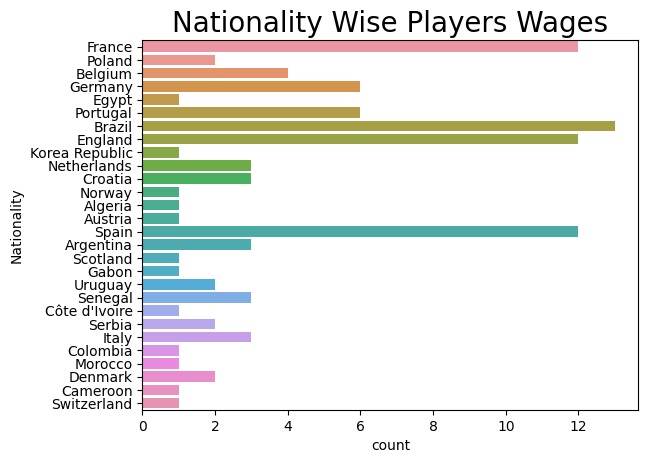

In [ ]:
sns.countplot(y="Nationality",data=top_wages.head(100))
plt.title("Nationality Wise Players Wages",
          fontsize=20);

<h4>So we can deduce that the Players that got the Maximum Wage are from Brazil, France, England and Spain.</h4>

<h3>7. Show the effect of the Age on the Potential of the Players:</h3>

<Axes: xlabel='Age', ylabel='Potential'>

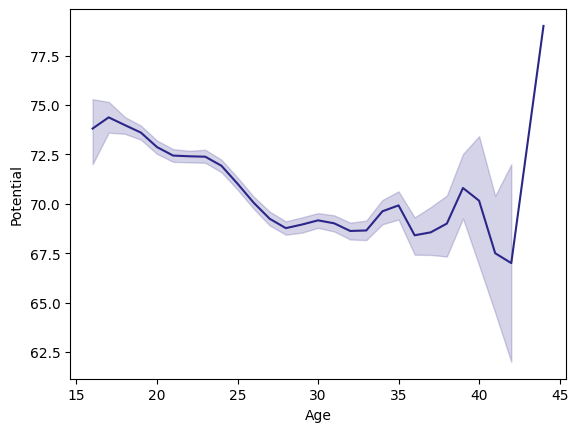

In [ ]:
sns.lineplot(x="Age", y="Potential", data=data)

<h4>While the Age Increases the Potential of the Player Decreases.</h4>

<h3>8. View the Top 50 Players and their Clubs:</h3>

In [ ]:
top_rated = data.sort_values(by=["Overall"], ascending=False)
top50 = top_rated.head(50)

<h3>Plot The Top 50 Players</h3>

<Axes: xlabel='Name', ylabel='Overall'>

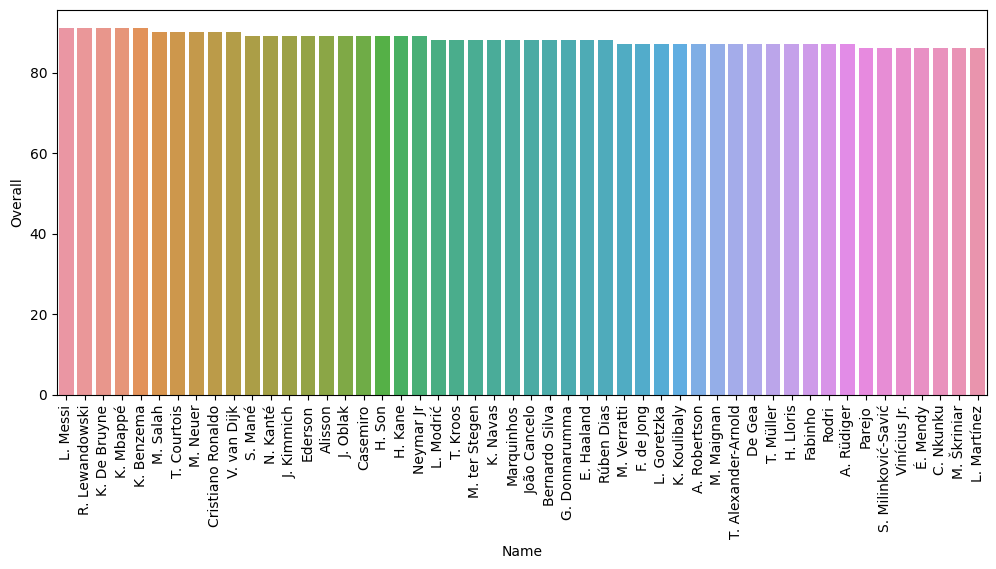

In [ ]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Overall", data=top50)

<Axes: xlabel='Club', ylabel='count'>

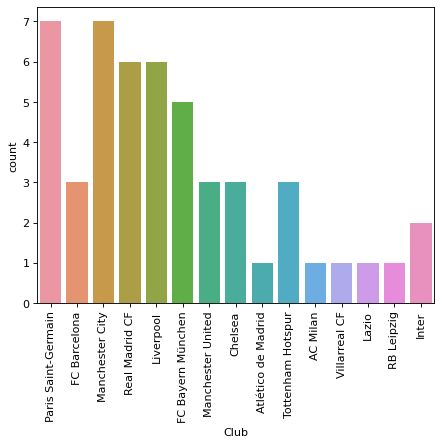

In [ ]:
plt.figure(dpi=80)
plt.xticks(rotation=90)
sns.countplot(x="Club", data=top50)

<h4>- Paris Saint-Germain and Machester City have the maximum top Players numbers.</br></br>
    - Liverpool and Real Madrid have the second Maximum top Players numbers.</h4>


# Data Preprocessing:

<h3>1. Handle the missing values:</h3>

In [ ]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i, " ", data[i].isnull().sum())

ContractUntil   92


<h4>ContractUntil Column:</h4>

In [ ]:
print("The percentage of the null values is: ", (data["ContractUntil"].isnull().sum()/data.shape[0])*100, "%")

The percentage of the null values is:  0.49625114623226707 %


**As** the percentage of nulls is small so we can drop the values of nulls in that column.

In [ ]:
data.drop(data[data["ContractUntil"].isnull()].index, axis = 0, inplace =True)

In [ ]:
data["ContractUntil"].isnull().sum()

0

<h3>2. Handling The Categorical Columns:</h3>

In [ ]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)

Name
BestPosition
Club
PreferredFoot
Nationality
AttackingWorkRate
DefensiveWorkRate


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["PreferredFoot"] = le.fit_transform(data["PreferredFoot"])
data["AttackingWorkRate"] = le.fit_transform(data["AttackingWorkRate"])
data["DefensiveWorkRate"] = le.fit_transform(data["DefensiveWorkRate"])
data["Club"] = le.fit_transform(data["Club"])


<h3>Merge Some Players Positions to reduce the number of classes:</h3>

In [ ]:
merge_pos = {'LWB' : 'LW', 'RWB': 'RW', 'ST': 'CF', 'CAM': 'CM', 'CDM': 'CM'}

data = data.replace({'BestPosition': merge_pos})

In [ ]:
mapping = {'CF': 0, 'CM': 1, 'RW': 2, 'GK': 3, 'CB': 4, 'LW': 5, 'LM': 6, 'LB': 7,'RM': 8, 'RB': 9}

data = data.replace({'BestPosition': mapping})

<h2>Split the Data to Train and Test sets:</h2>

In [ ]:
X = data.drop(["BestPosition", "Nationality", "ID"], axis = 1)
Y = pd.DataFrame(data["BestPosition"])

top = data.sort_values(by=["Overall"], ascending=False).head(20)

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
X_Train = X_Train.drop(["Name"], axis = 1)
test_names = X_Test["Name"]
X_Test = X_Test.drop(["Name"], axis = 1)

top_pos = top["BestPosition"]
top_names = top["Name"]
top = top.drop(["Name", "BestPosition", "Nationality", "ID"], axis = 1)

<h3>3. Handle the Imbalanced Data:</h3>

<Axes: xlabel='BestPosition', ylabel='count'>

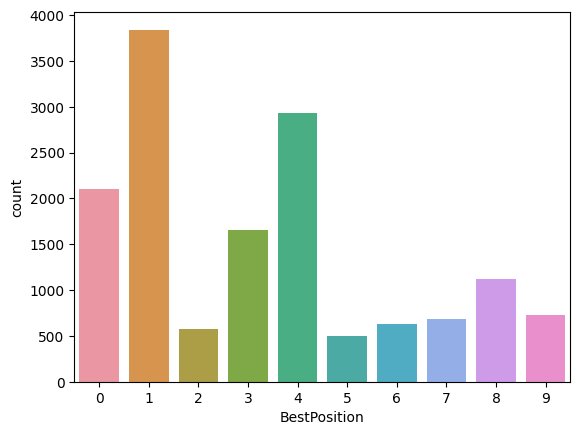

In [ ]:
sns.countplot(x="BestPosition", data = Y_Train)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling  import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)

In [ ]:
print(f' X_shape: {X_Train.shape} \n y_shape: {Y_Train.shape}')

 X_shape: (27732, 61) 
 y_shape: (27732, 1)


<Axes: xlabel='BestPosition', ylabel='count'>

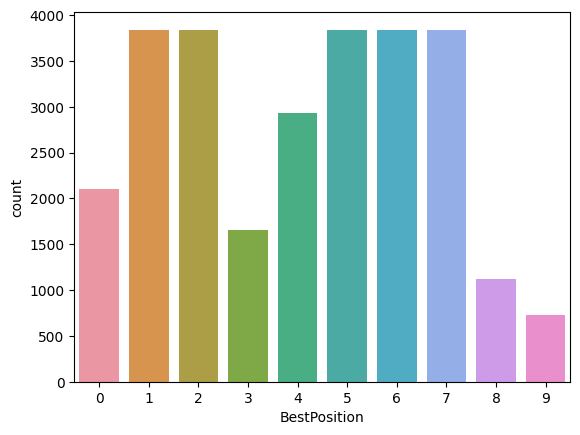

In [ ]:
sns.countplot(x="BestPosition", data = Y_Train)

<h3>4. Feature Scaling:</h3>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_Train = mms.fit_transform(X_Train)
X_Test = mms.fit_transform(X_Test)

top = mms.fit_transform(top)

# Modeling

## A. Predict the Position of the Player Using Classification Algorithms:

<h3>Functions to be Used: </h3>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))

models_names = []
models_scores = []
models_auc_scores = []

In [ ]:
positions = ['CF', 'CM', 'RW', 'GK', 'CB', 'LW', 'LM', 'LB','RM', 'RB']
positions

['CF', 'CM', 'RW', 'GK', 'CB', 'LW', 'LM', 'LB', 'RM', 'RB']

<h3>1. Logistic Regression:</h3>

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_Train , Y_Train)

LogisticRegression()

In [ ]:
lr.score(X_Train, Y_Train)

0.7016803692485216

In [ ]:
lr.score(X_Test, Y_Test)

0.7547425474254743

In [ ]:
Y_Pred_lr = lr.predict(X_Test)

In [ ]:
models_names.append("Logistic Regression")
models_scores.append(lr.score(X_Test, Y_Test))

In [ ]:
classification_report_fun("Logistic Regression", Y_Test, Y_Pred_lr)

The Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       522
           1       0.91      0.74      0.82       962
           2       0.24      0.65      0.35       132
           3       1.00      1.00      1.00       391
           4       0.88      0.95      0.91       711
           5       0.38      0.22      0.28       116
           6       0.34      0.70      0.46       168
           7       0.61      0.84      0.71       178
           8       0.70      0.36      0.48       313
           9       0.72      0.29      0.42       197

    accuracy                           0.75      3690
   macro avg       0.67      0.66      0.63      3690
weighted avg       0.81      0.75      0.76      3690



In [ ]:
Y_Proba_lr = lr.predict_proba(X_Test)

In [ ]:
auc_score_lr = roc_auc_score(Y_Test, Y_Proba_lr, multi_class = 'ovr', average = 'macro')
auc_score_lr

0.9651230135004134

In [ ]:
models_auc_scores.append(auc_score_lr)

<h3>2. Random Forest:</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=50)

In [ ]:
rf.fit(X_Train, Y_Train)

RandomForestClassifier(n_estimators=50)

In [ ]:
rf.score(X_Train, Y_Train)

1.0

In [ ]:
rf.score(X_Test, Y_Test)

0.8010840108401084

In [ ]:
Y_Pred_rf = rf.predict(X_Test)

In [ ]:
models_names.append("Random Forest")
models_scores.append(rf.score(X_Test, Y_Test))

In [ ]:
classification_report_fun("Random Forest", Y_Test, Y_Pred_rf)

The Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       522
           1       0.82      0.84      0.83       962
           2       0.35      0.28      0.31       132
           3       1.00      1.00      1.00       391
           4       0.90      0.95      0.92       711
           5       0.44      0.23      0.31       116
           6       0.54      0.51      0.53       168
           7       0.68      0.79      0.73       178
           8       0.63      0.55      0.59       313
           9       0.68      0.67      0.68       197

    accuracy                           0.80      3690
   macro avg       0.69      0.68      0.68      3690
weighted avg       0.79      0.80      0.79      3690



In [ ]:
Y_Proba_rf = rf.predict_proba(X_Test)

In [ ]:
auc_score_rf = roc_auc_score(Y_Test, Y_Proba_rf, multi_class = 'ovr', average = 'macro')
auc_score_rf

0.9619072357935938

In [ ]:
models_auc_scores.append(auc_score_rf)

<h3>3. Decision Tree:</h3>

In [ ]:
from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features = 39,max_depth = 10)

In [ ]:
dt.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=10, max_features=39)

In [ ]:
dt.score(X_Train, Y_Train)

0.7502524159815376

In [ ]:
dt.score(X_Test, Y_Test)

0.6355013550135501

In [ ]:
Y_Pred_dt = dt.predict(X_Test)

In [ ]:
models_names.append("Decision Tree")
models_scores.append(dt.score(X_Test, Y_Test))

In [ ]:
classification_report_fun("Decision Tree", Y_Test, Y_Pred_dt)

The Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       522
           1       0.80      0.60      0.69       962
           2       0.16      0.67      0.26       132
           3       1.00      1.00      1.00       391
           4       0.89      0.80      0.84       711
           5       0.20      0.38      0.26       116
           6       0.31      0.48      0.37       168
           7       0.44      0.65      0.52       178
           8       0.47      0.27      0.34       313
           9       0.47      0.09      0.15       197

    accuracy                           0.64      3690
   macro avg       0.56      0.57      0.52      3690
weighted avg       0.72      0.64      0.66      3690



In [ ]:
Y_Proba_dt = dt.predict_proba(X_Test)

In [ ]:
auc_score_dt = roc_auc_score(Y_Test, Y_Proba_dt, multi_class = 'ovr', average = 'macro')
auc_score_dt

0.9038799127331876

In [ ]:
models_auc_scores.append(auc_score_dt)

<h3>4. KNN:</h3>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)

In [ ]:
knn.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
knn.score(X_Train, Y_Train)

0.8590797634501659

In [ ]:
knn.score(X_Test, Y_Test)

0.6357723577235772

In [ ]:
Y_Pred_knn = knn.predict(X_Test)

In [ ]:
models_names.append("KNN")
models_scores.append(knn.score(X_Test, Y_Test))

In [ ]:
classification_report_fun("KNN", Y_Test, Y_Pred_knn)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       522
           1       0.78      0.58      0.67       962
           2       0.16      0.60      0.25       132
           3       1.00      1.00      1.00       391
           4       0.92      0.83      0.87       711
           5       0.15      0.37      0.22       116
           6       0.25      0.46      0.32       168
           7       0.41      0.56      0.47       178
           8       0.68      0.24      0.35       313
           9       0.71      0.18      0.28       197

    accuracy                           0.64      3690
   macro avg       0.59      0.56      0.53      3690
weighted avg       0.75      0.64      0.66      3690



In [ ]:
Y_Proba_knn = knn.predict_proba(X_Test)

In [ ]:
auc_score_knn = roc_auc_score(Y_Test, Y_Proba_knn, multi_class = 'ovr', average = 'macro')
auc_score_knn

0.8485113881748434

In [ ]:
models_auc_scores.append(auc_score_knn)

<h3>Compare the Test Accuracy of the 4 Classification Algorithms:</h3>


<h3>Based on the Accuracy: </h3>

In [ ]:
comp = pd.DataFrame()
comp['name'] = models_names
comp['score'] = models_scores
comp

,name,score
0,Logistic Regression,0.754743
1,Random Forest,0.801084
2,Decision Tree,0.635501
3,KNN,0.635772


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = comp.style.background_gradient(cmap=cm)
s

,name,score
0,Logistic Regression,0.754743
1,Random Forest,0.801084
2,Decision Tree,0.635501
3,KNN,0.635772


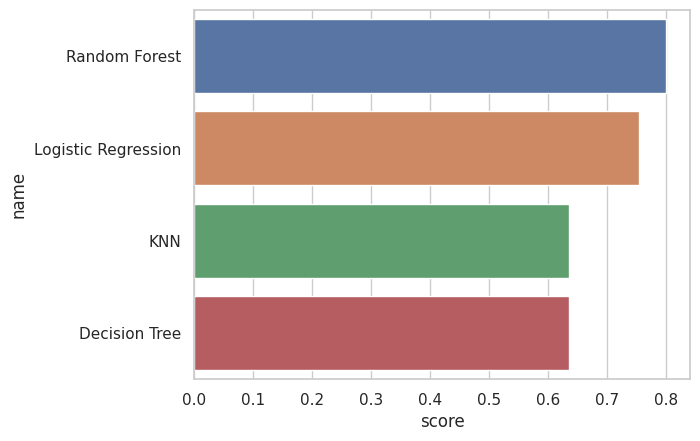

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp.sort_values(by="score", ascending=False))

<h3>Based on the ROC AUC Score:</h3>

In [ ]:
comp_auc = pd.DataFrame()
comp_auc['name'] = models_names
comp_auc['score'] = models_auc_scores
comp_auc

,name,score
0,Logistic Regression,0.965123
1,Random Forest,0.961907
2,Decision Tree,0.903880
3,KNN,0.848511


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = comp_auc.style.background_gradient(cmap=cm)
s

,name,score
0,Logistic Regression,0.965123
1,Random Forest,0.961907
2,Decision Tree,0.903880
3,KNN,0.848511


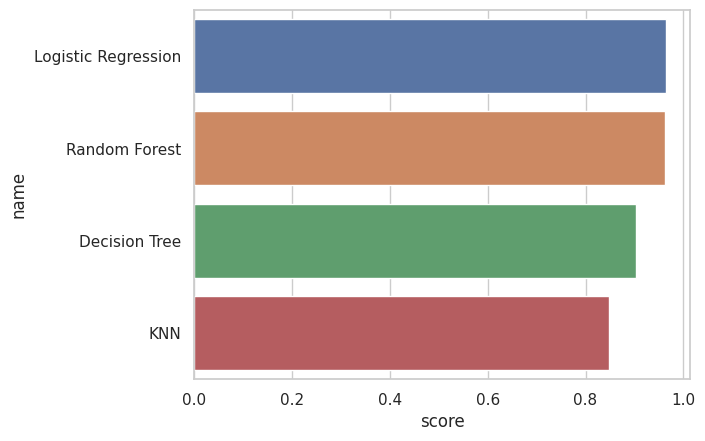

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp_auc.sort_values(by="score", ascending=False))

<h3>So We can deduce that the Best Algorithm for this Data is the Random Forest Classifier </h3>

<h3>Test the Algorithm on the top 20 Players:</h3>

In [ ]:
top = pd.DataFrame(top)

for i in range(top.shape[0]):
    pred_pos = rf.predict(top.iloc[[i]])[0]

    pred = list(mapping.keys())[list(mapping.values()).index(pred_pos)]
    true_pos = list(mapping.keys())[list(mapping.values()).index(top_pos.iloc[i])]

    print('Name: {}\nPrediction: {}\n True Best Pos: {}\n'.format(top_names.iloc[i], pred, true_pos))

Name: L. Messi
Prediction: CM
 True Best Pos: CM

Name: R. Lewandowski
Prediction: CF
 True Best Pos: CF

Name: K. De Bruyne
Prediction: CM
 True Best Pos: CM

Name: K. Mbappé
Prediction: CF
 True Best Pos: CF

Name: K. Benzema
Prediction: CF
 True Best Pos: CF

Name: M. Salah
Prediction: RW
 True Best Pos: RW

Name: T. Courtois
Prediction: GK
 True Best Pos: GK

Name: M. Neuer
Prediction: GK
 True Best Pos: GK

Name: Cristiano Ronaldo
Prediction: CF
 True Best Pos: CF

Name: V. van Dijk
Prediction: CB
 True Best Pos: CB

Name: S. Mané
Prediction: CF
 True Best Pos: LM

Name: N. Kanté
Prediction: CM
 True Best Pos: CM

Name: J. Kimmich
Prediction: CM
 True Best Pos: CM

Name: Ederson
Prediction: GK
 True Best Pos: GK

Name: Alisson
Prediction: GK
 True Best Pos: GK

Name: J. Oblak
Prediction: GK
 True Best Pos: GK

Name: Casemiro
Prediction: CB
 True Best Pos: CM

Name: H. Son
Prediction: LW
 True Best Pos: LW

Name: H. Kane
Prediction: CF
 True Best Pos: CF

Name: Neymar Jr
Prediction